<a href="https://colab.research.google.com/github/Bang-JW/kaggle_study/blob/main/kaggle_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋에 대한 설명

 - Customer care calls : 배송조회 문의전화 건수
 

# 찾아내고 싶은 정보


 - 창고 블럭별 상품 운송 수단의 관계 -> 어떤식으로 진행해야 할까요..?
 - 제때 도착하는 상품의 특징들
 - 성별과 할인율 상품

## 머신러닝까지 봤을 때

 - 어떤 상품이 제때 도착할까에 대한 예측(kaggle을 참조했습니다)

In [ ]:
! pip install category_encoders

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Load 및 Index 설정

In [4]:
# 고객의 ID를 인덱스로 설정

data = pd.read_csv('data.csv')

In [5]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [6]:
# ID 컬럼 drop
data = data.drop('ID', axis = 1)

In [7]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


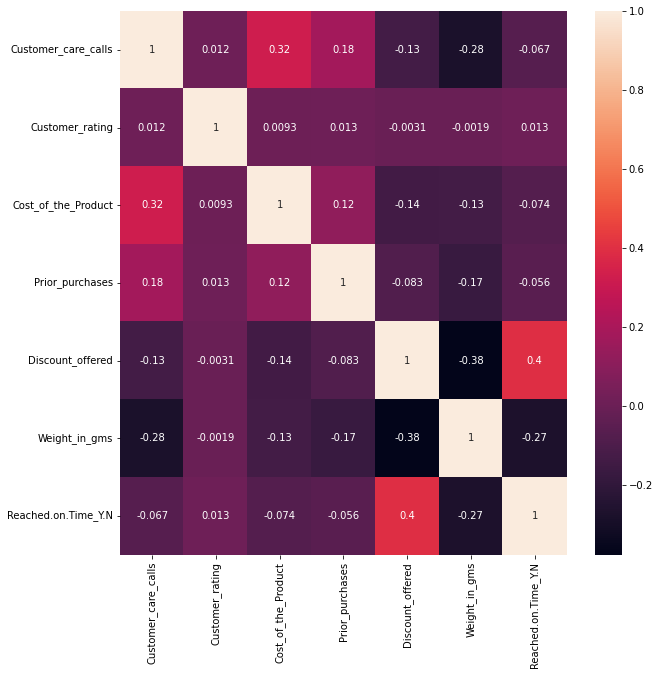

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

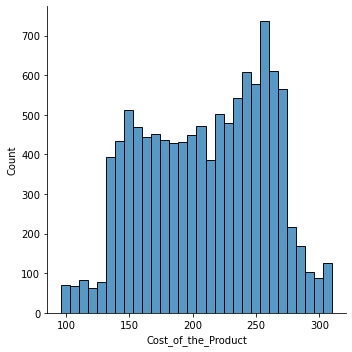

In [ ]:
# 상품의 가격대 분포
sns.displot(data['Cost_of_the_Product'])

# ML Part 1

 - 상품이 제 때 도착하는 것에 대한 예측
 - feature : 'Customer_care_calls', 'Customer_rating', 'Cost_of_Product', 'Discount_offered', 'Product_importance', 'Discount_offered'
 - target : 'Reached_on_Time_Y.N' 

In [27]:
# featurn 및 target 설정

feature = [ 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Discount_offered', 'Product_importance']
target = data.columns[-1]

In [28]:
X = data[feature]
y = data[target]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [30]:
X_train

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Discount_offered,Product_importance
1473,3,3,201,36,high
10730,4,1,253,1,low
2510,3,2,143,63,medium
2797,3,1,225,43,high
647,5,2,105,1,high
...,...,...,...,...,...
7351,3,2,154,6,low
272,4,5,148,43,medium
7218,5,5,262,9,low
3009,5,4,147,21,medium


In [31]:
# 기준모델 
data['Reached.on.Time_Y.N'].value_counts(normalize = True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [41]:
randomforest_pipeline = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(max_depth = 10)
)

randomforest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Product_importance'],
                               use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10))])

In [42]:
randomforest_pipeline.score(X_train, y_train)

0.7974769860211388

In [43]:
randomforest_pipeline.score(X_test, y_test)

0.6254545454545455

In [44]:
y_pred = randomforest_pipeline.predict(X_test)

In [45]:
acc = accuracy_score(y_test, y_pred)
print("정확도 : {:.2f}".format(acc))

정확도 : 0.63


# ML Part 2 운송수단, 창고별 가격 예측

 - 운송수단과 창고 위치에 따른 가격 예측


In [10]:
# Data 준비

linreg_data = data.loc[:,['Mode_of_Shipment', 'Warehouse_block', 'Cost_of_the_Product']]

In [11]:
linreg_data

,Mode_of_Shipment,Warehouse_block,Cost_of_the_Product
0,Flight,D,177
1,Flight,F,216
2,Flight,A,183
3,Flight,B,176
4,Flight,C,184
...,...,...,...
10994,Ship,A,252
10995,Ship,B,232
10996,Ship,C,242
10997,Ship,F,223


In [12]:
feature = ['Mode_of_Shipment', 'Warehouse_block']
target = ['Cost_of_the_Product']

X = linreg_data[feature]
y = linreg_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [13]:
onehot_enc = OneHotEncoder(use_cat_names=True)
X_train_encoded = onehot_enc.fit_transform(X_train)
X_test_encoded = onehot_enc.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train_encoded, y_train)

LinearRegression()

In [15]:
y_pred = linreg.predict(X_test_encoded)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_test, y_pred)) 
print(mean_squared_error(y_test, y_pred)) 

0.0001431532971317706
2379.7953178267044


# ML Part3 column 다 포함해서 제 시간에 도착하는지에 대한 여부 예측

In [25]:
# 기준모델 
data['Reached.on.Time_Y.N'].value_counts(normalize = True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [18]:
feature =data.columns[:-1]
target = data.columns[-1]

X = data[feature]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [22]:
randomforest_pipeline = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(max_depth = 5)
)

randomforest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Warehouse_block', 'Mode_of_Shipment',
                                     'Product_importance', 'Gender'],
                               use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5))])

In [23]:
randomforest_pipeline.score(X_train, y_train)

0.7034890328446415

In [24]:
randomforest_pipeline.score(X_test, y_test)

0.6645454545454546